# HW1_Overlapping Frame


**Objectives**
1. Can use expression, string and list, selection, and repetition
2. Notice difference between homeworks and graders 
3. Can work according the program requirement 

**Submission**
1. We focus on plagiarism. You must submit only works done by yourself
2. Submit the .ipynb in MyCourseVille (choose File->Download->Download .ipynb)
3. Name your file HW1_XXXXXXXXX.ipynb when XXXXXXXXXX is your student id
4. Deadline is specified by your section

**Your Task**

- There are many frames stored in a single list. Information of each frame is `x, y, w, h` which store real number representing coordination `(x, y)` of the top left corner, width (`w`), and height (`h`) of the frame.
- Information of n frames are stored in a list `[x1, y1, w1, h1, x2, y2, w2, h2, ..., xn, yn, wn, hn]` 
- You can access information of the ith frame using `(i-1)*4`. 
  - Get `x` of ith frame from index `(i-1)*4`
  - Get `y` of ith frame from index `(i-1)*4+1`
  - Get `w` of ith frame from index `(i-1)*4+2`
  - Get `h` of ith frame from index `(i-1)*4+3`

Write a program which do the following 
1. Read input from the keyboard (provided at the beginning of the cell)
2. Read command from the keyboard while the command is still not eqaul to `'end'`. The command is in the format decribed below:
  - `'center i'` where `i` is the `ith` frame.
    - **Output** print the centroid of the ith frame in format `(x,y)` where `x` and `y` are the coordinate of the centroid of the frame. The centroid of the frame is the intersection of the diagonals of the frames. 
  - `'distance f1 f2'` where `f1` and `f2` are integers representing the frame number of two frames. 
    - **Output** print the distance of the centroid of both frames. 
  - `'intersection f1 f2'` where `f1` and `f2` are integers representing the frame number of two frames.
    - **Output** print the overlapping area of `f1` and `f2`
  - `'union f1 f2'` where `f1` and `f2` are integers representing the frame number of two frames. 
    - **Output** print the area cover by `f1` or `f2`
  - `'iou f1 f2'` where `f1` and `f2` are integers representing the frame number of two frames. 
    - **Output** print the ratio of intersection area and union area of `f1` and `f2`

## Example

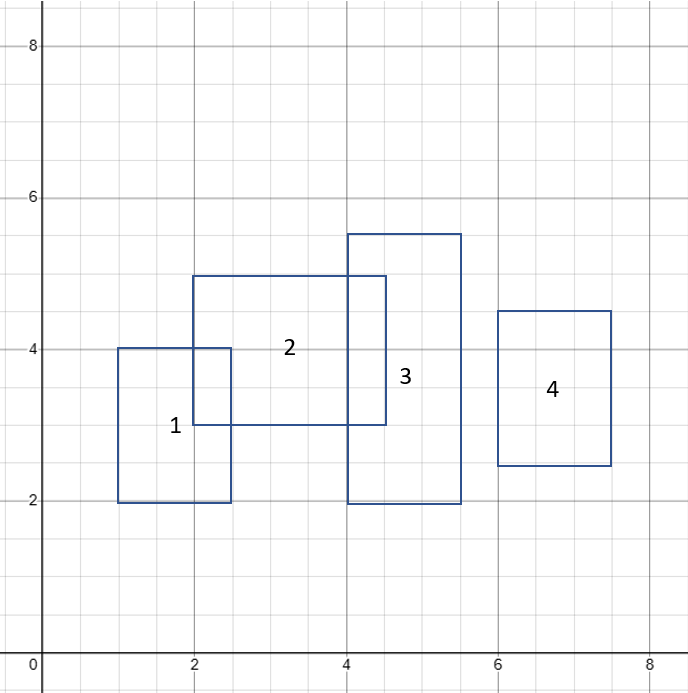

In the image above, there are four frames, and input from the keyboard is 

```'1.0 4.0 1.5 2.0 2.0 5.0 2.5 2.0 4.0 5.5 1.5 3.5 6.0 4.5 1.5 2.0'```

If the input are as below:

```
center 1
center 2
distance 1 2
intersection 1 2
intersection 1 3
intersection 2 3
union 1 2
union 2 3
iou 1 2
iou 1 3
end
```

The required output will be:

```
(1.75,3.0)
(3.25,4.0)
1.8027756377319946
0.5
0.0
1.0
7.5
9.25
10.0
0.06666666666666667
0.0
```



In [4]:
# HW01 (Don't delete this line or add any line above this line.)

frames = [float(x) for x in input().split()]

# write your program under this line
def findCenter(x, y, w, h):
    return (x + w / 2, y - h / 2)

def findDistance(r1x, r1y, r1w, r1h, r2x, r2y, r2w, r2h):
    r1 = findCenter(r1x,r1y,r1w,r1h)
    r2 = findCenter(r2x,r2y,r2w,r2h)
    return ((r1[0] - r2[0]) ** 2 + (r1[1] - r2[1]) ** 2) ** 0.5

def findIntersection(r1x, r1y, r1w, r1h, r2x, r2y, r2w, r2h):
    dx = min(r1x + r1w, r2x + r2w) - max(r1x, r2x)
    dy = min(r1y, r2y) - max(r1y - r1h, r2y - r2h)
    if (dx >= 0) and (dy >= 0): return dx * dy
    else: return 0.0

def findUnion(r1x, r1y, r1w, r1h, r2x, r2y, r2w, r2h):
    return r1w * r1h + r2w * r2h - findIntersection(r1x, r1y, r1w, r1h, r2x, r2y, r2w, r2h)

def findIou(r1x, r1y, r1w, r1h, r2x, r2y, r2w, r2h):
    return findIntersection(r1x, r1y, r1w, r1h, r2x, r2y, r2w, r2h) / findUnion(r1x, r1y, r1w, r1h, r2x, r2y, r2w, r2h)

while True:
    userInput = input().lower()
    command = userInput.split()[0]
    args = [int(x) for x in userInput.split()[1:]]

    if command == "center":
        print(findCenter(
            frames[(args[0] - 1) * 4 + 0], 
            frames[(args[0] - 1) * 4 + 1], 
            frames[(args[0] - 1) * 4 + 2], 
            frames[(args[0] - 1) * 4 + 3]
        ))
    elif command == "distance":
        print(findDistance(
            frames[(args[0] - 1) * 4 + 0], 
            frames[(args[0] - 1) * 4 + 1], 
            frames[(args[0] - 1) * 4 + 2], 
            frames[(args[0] - 1) * 4 + 3],
            frames[(args[1] - 1) * 4 + 0], 
            frames[(args[1] - 1) * 4 + 1], 
            frames[(args[1] - 1) * 4 + 2], 
            frames[(args[1] - 1) * 4 + 3],
        ))
    elif command == "intersection":
        print(findIntersection(
            frames[(args[0] - 1) * 4 + 0], 
            frames[(args[0] - 1) * 4 + 1], 
            frames[(args[0] - 1) * 4 + 2], 
            frames[(args[0] - 1) * 4 + 3],
            frames[(args[1] - 1) * 4 + 0], 
            frames[(args[1] - 1) * 4 + 1], 
            frames[(args[1] - 1) * 4 + 2], 
            frames[(args[1] - 1) * 4 + 3],
        ))
    elif command == "union":
        print(findUnion(
            frames[(args[0] - 1) * 4 + 0], 
            frames[(args[0] - 1) * 4 + 1], 
            frames[(args[0] - 1) * 4 + 2], 
            frames[(args[0] - 1) * 4 + 3],
            frames[(args[1] - 1) * 4 + 0], 
            frames[(args[1] - 1) * 4 + 1], 
            frames[(args[1] - 1) * 4 + 2], 
            frames[(args[1] - 1) * 4 + 3],
        ))
    elif command == "iou":
        print(findIou(
            frames[(args[0] - 1) * 4 + 0], 
            frames[(args[0] - 1) * 4 + 1], 
            frames[(args[0] - 1) * 4 + 2], 
            frames[(args[0] - 1) * 4 + 3],
            frames[(args[1] - 1) * 4 + 0], 
            frames[(args[1] - 1) * 4 + 1], 
            frames[(args[1] - 1) * 4 + 2], 
            frames[(args[1] - 1) * 4 + 3],
        ))
    elif command == "end":
        break

(1.75, 3.0)
(3.25, 4.0)
1.8027756377319946
0.5
0.0
1.0
7.5
9.25
0.06666666666666667
0.0
